# 안녕하세요 투빅스 보충 과제입니다 :)

안녕하세요 투빅스 12기 김태한입니다 :)

이번 과제는 코로나 바이러스로 예상치 못한 휴식시간이 생겨 여러분의 딥러닝 감을 유지하고자 드리게 되었습니다.  

투빅이분들이라면 분명 쉽게 해낼거라 믿습니다!!


모르시는 거 있으시면 저 그리고 12기 멘토분들을 많이 많이 괴롭혀주세요!!!

# Assignment 1

여러분들은 저번 과제로 뉴럴넷 구현을 이미 한번 하셨습니다!  

사실 이번 과제의 최종 목적도 뉴럴넷 구현인데요 이미 한번 하셨고 실력들이 워낙 출중하셔서 금방금방 하실수 있으실거에요.  

구현에 바로 들어가기에 앞서 전체 네트워크 구조와 각 구성요소의 행렬 차원 및 오차역전파(back propagation) 복습이 1번 과제입니다.  

**?** 에 들어갈 수식을 채워주시면 됩니다!!  

## Matrix Shape 정리

n : sample_data 수  
d : input_dimension  
h : hidden_layer_dimension  
c : output_dimension  

X : input_data  
W1 : layer1_weight  
b1 : layer1_bias  
H : X*W1+b1
A : activation function 거친 value
W2 : layer2_weight  
b2 : layer2_bias  
S : A*W2+b2  
P : softmax 거친 value  

**X==(n,d)  
W1==(d,h) 채워주세요  
b1==(h,)  
H==(n,h) 채워주세요  
A==(n,h)  
W2==(h,c)  
b2==(1,c) 채워주세요  
S==(n,c) 채워주세요  
P==(n,c)**

## Matrix 미분 정리
$H = XW+b　　　(n,h) = (n,d)x(d,h)+(h,)$  
$L = f(H)$  
$\frac{\partial L}{\partial W} = \frac{\partial H}{\partial W} \times \frac{\partial L}{\partial H} = f'(W)\frac{\partial L}{\partial H}$ 　채워주세요  
$\frac{\partial L}{\partial X} = \frac{\partial L}{\partial H} \times \frac{\partial H}{\partial X} = \frac{\partial L}{\partial H}f'(X)$ 　채워주세요  
$\frac{\partial L}{\partial b} = 1*\frac{\partial L}{\partial H}$  
  --> 여기서 1은 단위행렬(I)

## 2Layers Chain Rule 정리
**Forward** 

$H = XW_{1} + b$  
$A = ReLU(H)$  
$S = AW_{2} + b_{2}$  
$P = Softmax(S)$  
$L = -LogLikelihood(P)$


**Backward**

$\frac{\partial L}{\partial S} = P-T$　:　T는 Label  
$\frac{\partial L}{\partial W_{2}} = \frac{\partial S}{\partial W_{2}}\frac{\partial L}{\partial S} = A^{T}(P-T)$ 　채워주세요  
$\frac{\partial L}{\partial b_{2}} = 1*\frac{\partial L}{\partial S} = P-T$  
$\frac{\partial L}{\partial A} = \frac{\partial L}{\partial S}\frac{\partial S}{\partial A} = W_{2}^{T}$　채워주세요  
$\frac{\partial L}{\partial H} = \frac{\partial A}{\partial H}\frac{\partial L}{\partial A}$  
$\frac{\partial L}{\partial W_{1}} = \frac{\partial H}{\partial W_{1}}\frac{\partial L}{\partial H} = X^{T}\frac{\partial L}{\partial H}$  
$\frac{\partial L}{\partial b_{1}} = \frac{\partial L}{\partial H}$  

# Assignment 2

같이 드린 파일중 model.py라는 파일이 있을거에요!!!  
그 친구의 빈칸을 채워주시면 되겠습니다~!!  
model.py의 함수는 assignment3의 모델 만들기에서 사용되니 참고하시면서 채워주시면 도움이 될거에요!

# Assignment 3

자 이제 저희가 구현한 모델을 가지고 한번 cifar-10 dataset을 학습해볼게요!!  
근데 시작하기에 앞서 pip install keras 를 해주세요!!  

3번과제의 목적은 하이퍼파라미터를 튜닝하던 다른방법을 사용하던 해서 마지막에 그림그리기에서 높은 validation accuracy가 나오도록 하는 과제입니다!!  

모델을 2층이아니라 본인만의 3층으로 발전시켜도 좋구요 다른 여러가지 방법들이 있겠죠!?!?!?  

가장 높은 validation accuracy를 뽑으신 분께 상품을 드리겠습니다아~!!!

### 데이터 load

keras 프레임워크를 이용하여 데이터를 로드해 옵니다.  
32*32*3차원의 데이터를 3072차원으로 바꾸는 것 까지 해드릴게요.
필요하면 sklearn.preprocessing의 scaler를 사용해보셔도 좋습니다!

In [1]:
from keras.datasets import cifar10
import numpy as np
from Model import TwoLayerNet
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
def preprocessing_data(x_train, x_test, y_train, y_test):
    #change dtype
    x_train = np.array(x_train, dtype=np.float64)
    x_test = np.array(x_test, dtype=np.float64)
    
    #reshaping
    x_train = np.reshape(x_train, (x_train.shape[0], -1))
    x_test = np.reshape(x_test, (x_test.shape[0], -1))
    
    y_train = np.reshape(y_train, (y_train.shape[0],))
    y_test = np.reshape(y_test, (y_test.shape[0],))
        
    #normalizing
    mean_value = np.mean(x_train, axis=0)
    x_train -= mean_value
    x_test -= mean_value
    
    return x_train, x_test, y_train, y_test

In [4]:
x_train, x_test, y_train, y_test = preprocessing_data(x_train, x_test, y_train, y_test)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 3072)
(10000, 3072)
(50000,)
(10000,)


데이터가 너무 많아서 5000개랑 1000개만 사용해보도록 할게요

In [6]:
x_train = x_train[:5000]
y_train = y_train[:5000]
x_test = x_test[:1000]
y_test = y_test[:1000]

### 데이터 확인

실제 데이터가 어떻게 생겼는지 한번 봅시다

In [7]:
x_train

array([[ -71.71074,  -74.05614,  -69.5538 , ...,   -3.63908,  -33.8503 ,
         -42.38186],
       [  23.28926,   40.94386,   54.4462 , ...,   16.36092,    7.1497 ,
          29.61814],
       [ 124.28926,  118.94386,  122.4462 , ...,  -46.63908,  -39.8503 ,
         -30.38186],
       ...,
       [  36.28926,   26.94386,   12.4462 , ...,  -84.63908,  -47.8503 ,
         -30.38186],
       [  23.28926,   15.94386,   -7.5538 , ...,   67.36092,  121.1497 ,
          -0.38186],
       [ -85.71074, -104.05614, -111.5538 , ...,   29.36092,   16.1497 ,
         -14.38186]])

### 하이퍼파라미터 설정

이제 하이퍼파라미터를 설정해볼게요.  
hidden_size, epoch_size, batch_size, learning_rate등은 전부 하이퍼 파라미터이니 바꾸면서 도전해보세요!!

시도해본 하이퍼 파라미터

In [76]:
# 0.408
input_size = 32 * 32 * 3
hidden_size = 79
output_size = 10
epoch_size = 1000 # 그라디언트를 몇 번 할 건지
batch_size = 128
learning_rate = 0.001
N = x_train.shape[0]

In [86]:
# 0.413
input_size = 32 * 32 * 3
hidden_size = 79
output_size = 10
epoch_size = 1000 # 그라디언트를 몇 번 할 건지
batch_size = 32
learning_rate = 0.001
N = x_train.shape[0]

In [91]:
# 0.416
input_size = 32 * 32 * 3
hidden_size = 79
output_size = 10
epoch_size = 1000 # 그라디언트를 몇 번 할 건지
batch_size = 72
learning_rate = 0.001
N = x_train.shape[0]

In [130]:
# 0.415
input_size = 32 * 32 * 3
hidden_size = 79
output_size = 10
epoch_size = 1000 # 그라디언트를 몇 번 할 건지
batch_size = 131
learning_rate = 0.001
N = x_train.shape[0]

In [160]:
# 0.423
input_size = 32 * 32 * 3
hidden_size = 80
output_size = 10
epoch_size = 1000 # 그라디언트를 몇 번 할 건지
batch_size = 128
learning_rate = 0.001
N = x_train.shape[0]

In [156]:
# 0.435, 다시 돌리니까 0.414 나옴..
input_size = 32 * 32 * 3
hidden_size = 79
output_size = 10
epoch_size = 1000 # 그라디언트를 몇 번 할 건지
batch_size = 130
learning_rate = 0.001
N = x_train.shape[0]

왜 돌릴 때마다 결과가 다른 걸까요..?

### 모델 만들기

input_size, hidden_size, output_size는 데이터에 맞게 잘 설정해주세요.

In [161]:
batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
x_batch = x_train[batch_mask]

In [162]:
nn = TwoLayerNet(x_batch, input_size=input_size, hidden_size=hidden_size, output_size=output_size)

In [163]:
history = {'val_acc': [],'val_loss': []} #기록해서 그림 그리자!

#코드를 보며 epoch, batch에 대해서 이해해봅시다.
for i in range(epoch_size):
    for j in range(N//batch_size):
        batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
        x_batch = x_train[batch_mask]
        t_batch = y_train[batch_mask]
        
        nn.backward(x_batch, t_batch, 1e-7) # 가중치 갱신
    
    #accuracy와 loss를 기록해둡시다.
    history["val_acc"].append(nn.accuracy(x_test, y_test))
    history["val_loss"].append(nn.forward(x_test, y_test))
    
    if i % 10 == 0:
        print(i, "test accuracy :", nn.accuracy(x_test, y_test))
        print(i, "test loss     :", nn.forward(x_test, y_test))

0 test accuracy : 0.09
0 test loss     : 2.798125664722932
10 test accuracy : 0.09
10 test loss     : 2.761823505943577
20 test accuracy : 0.136
20 test loss     : 2.5851089763006985
30 test accuracy : 0.151
30 test loss     : 2.4583822603434324
40 test accuracy : 0.19
40 test loss     : 2.359560867947695
50 test accuracy : 0.208
50 test loss     : 2.2772881388744026
60 test accuracy : 0.218
60 test loss     : 2.2237332219283203
70 test accuracy : 0.231
70 test loss     : 2.180798181712535
80 test accuracy : 0.239
80 test loss     : 2.140583976240832
90 test accuracy : 0.245
90 test loss     : 2.1042521784548596
100 test accuracy : 0.254
100 test loss     : 2.0705139004051225
110 test accuracy : 0.258
110 test loss     : 2.040797868440419
120 test accuracy : 0.273
120 test loss     : 2.0143249518433985
130 test accuracy : 0.28
130 test loss     : 1.9892044690138573
140 test accuracy : 0.284
140 test loss     : 1.968312925178981
150 test accuracy : 0.294
150 test loss     : 1.9483314823

### 그림 그리기

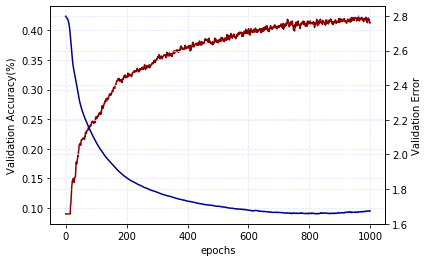

나의 최고 validation accuracy :  0.424


In [164]:
fig = plt.figure()
ax_acc = fig.add_subplot(111)

ax_acc.plot(range(epoch_size), history['val_acc'], label='정확도(%)', color='darkred')
#plt.text(3, 14.7, "<----------------정확도(%)", verticalalignment='top', horizontalalignment='right')
plt.xlabel('epochs')
plt.ylabel('Validation Accuracy(%)')
ax_acc.grid(linestyle='--', color='lavender')
ax_loss = ax_acc.twinx()
ax_loss.plot(range(epoch_size), history['val_loss'], label='오차', color='darkblue')
#plt.text(3, 2.2, "<----------------오차", verticalalignment='top', horizontalalignment='left')
plt.ylabel('Validation Error')
ax_loss.yaxis.tick_right()
ax_loss.grid(linestyle='--', color='lavender')

# 그래프 표시
plt.show()

# 나의 최고 validation accuracy는? 두구두구~
print("나의 최고 validation accuracy : ",max(history['val_acc']))